In [53]:
import numpy as np
from matplotlib import pyplot as plt

In [54]:
def f(x):
    return 3 * x**2 - 2 * x + 1

In [55]:
y = f(3.0)
y

22.0

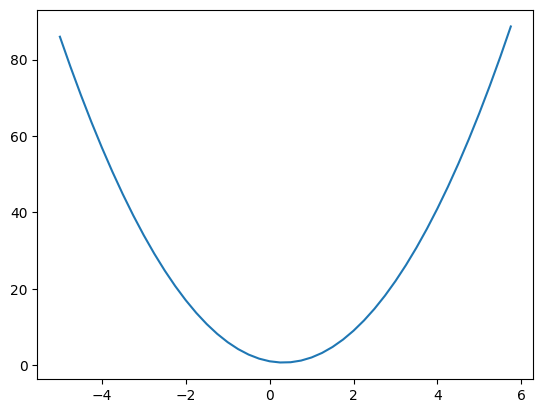

In [56]:
xs = np.arange(-5, 6, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [57]:
h = 0.000000000000001
x = 0.35
df = (f(x + h) - f(x)) / h
df

0.11102230246251564

In [58]:
h = 0.0001

a = 2.0
b = -2.0
c = 5.0
d1 = a * b + c
c += h
d2 = a * b + c
print(d2, (d2 - d1) / h)

1.0000999999999998 0.9999999999976694


In [59]:
class Value:
    def __init__(self, data, _prev=(), _op="", _label=""):
        self.data = data
        self._grad = 0.0
        self._prev = set(_prev)
        self._op = _op
        self._label = _label

    def __repr__(self):
        return f"Value({self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), "+")

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")


a = Value(2.0, _label="a")
a._grad = -8.0
b = Value(-2.0, _label="b")
b._grad = 8.0
c = Value(5.0, _label="c")
c._grad = 4.0
e = a * b
e._label = "e"
e._grad = 4.0
d = e + c
d._label = "d"
d._grad = 4.0
f = Value(4.0, _label="f")
f._grad = 1.0
L1 = d * f
L1._label = "L"
L1._grad = 1.0

In [60]:
from graphviz import Digraph


def trace(root):
    nodes, edges = set(), set()

    def build(node):
        if node not in nodes:
            nodes.add(node)
            for prev in node._prev:
                edges.add((prev, node))
                build(prev)

    build(root)
    return nodes, edges


def plot_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(uid, label="{ %s | data %0.4f | grad %0.4f }" % (n._label, n.data, n._grad), shape="record")
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

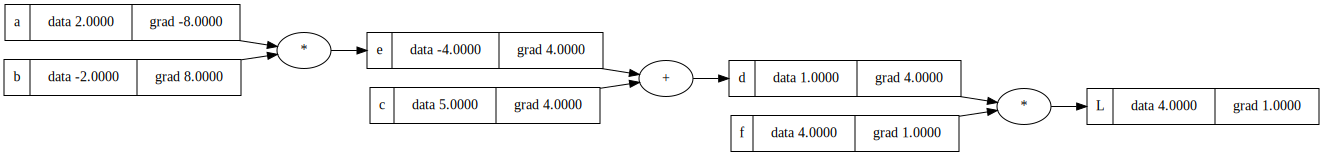

In [61]:
plot_dot(L1)

In [62]:
def lol():
    h = 1e-4

    a = Value(2.0, _label="a")
    b = Value(-2.0, _label="b")
    c = Value(5.0, _label="c")
    e = a * b
    e._label = "e"
    d = e + c
    d._label = "d"
    f = Value(4.0, _label="f")
    L1 = d * f
    L1._label = "L"
    L1._grad = 1.0

    a = Value(2.0, _label="a")
    b = Value(-2.0, _label="b")
    c = Value(5.0, _label="c")
    e = a * b
    e._label = "e"
    d = e + c
    d._label = "d"
    d.data += h
    f = Value(4.0, _label="f")
    L2 = d * f
    L2._label = "L"
    L2._grad = 1.0

    return (L2.data - L1.data) / h


lol()

3.9999999999995595